In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [348]:
income_data = "adult.data"
names =  ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
income_df = pd.read_csv(income_data, na_values=[" ?"],
                         header=None, 
                         names = names)
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [100]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Dealing with missing values

In [101]:
income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
predclass            0
dtype: int64

Slide Type
Attributes workclass, occupation, and native-country most NAs. Let's drop these NA.

In [102]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [103]:
my_df = income_df.dropna()

In [104]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
dtype: int64

In [105]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null float64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null float64
native-country    30162 non-null object
predclass         30162 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


### Pre Processing
Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. `LabelEncoder` encode labels with value between 0 and n_classes-1

In [106]:
le = preprocessing.LabelEncoder()

In [107]:
my_df.workclass = le.fit_transform(my_df.workclass)

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [108]:
my_df.education = le.fit_transform(my_df.education)

my_df.occupation = le.fit_transform(my_df.occupation)
my_df.relationship = le.fit_transform(my_df.relationship)
my_df.race = le.fit_transform(my_df.race)
my_df.sex = le.fit_transform(my_df.sex)
my_df.predclass = le.fit_transform(my_df.predclass)

### Predclass

In [109]:
#my_df.loc[income_df['predclass'] == ' >50K', 'predclass'] = 1
#my_df.loc[income_df['predclass'] == ' <=50K', 'predclass'] = 0

In [110]:
#predclass1 = my_df[my_df['predclass'] == 1]
#predclass0 = my_df[my_df['predclass'] == 0]

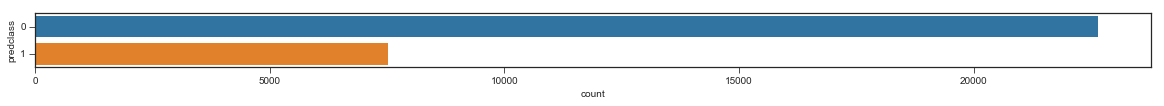

In [111]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df, order=my_df['predclass'].value_counts().index)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

### Education

In [112]:
my_df['education'].replace(' Preschool', 'dropout',inplace=True)
my_df['education'].replace(' 10th', 'dropout',inplace=True)
my_df['education'].replace(' 11th', 'dropout',inplace=True)
my_df['education'].replace(' 12th', 'dropout',inplace=True)
my_df['education'].replace(' 1st-4th', 'dropout',inplace=True)
my_df['education'].replace(' 5th-6th', 'dropout',inplace=True)
my_df['education'].replace(' 7th-8th', 'dropout',inplace=True)
my_df['education'].replace(' 9th', 'dropout',inplace=True)
my_df['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace(' HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace(' Masters', 'Masters',inplace=True)
my_df['education'].replace(' Prof-school', 'Masters',inplace=True)
my_df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [113]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
10,10,16
14,14,15
12,12,14
9,9,13
7,7,12
8,8,11
15,15,10
11,11,9
2,2,8
1,1,7


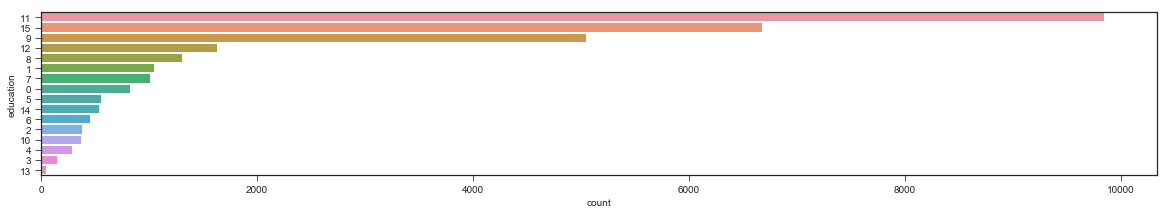

In [349]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df, order=my_df['education'].value_counts().index)

### Marital-status

In [115]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
my_df['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace([' Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


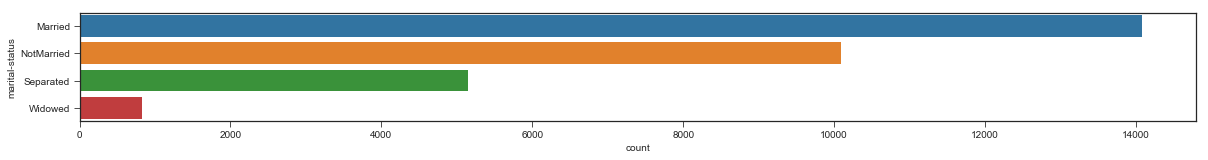

In [116]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df, order=my_df['marital-status'].value_counts().index)

### Occupation

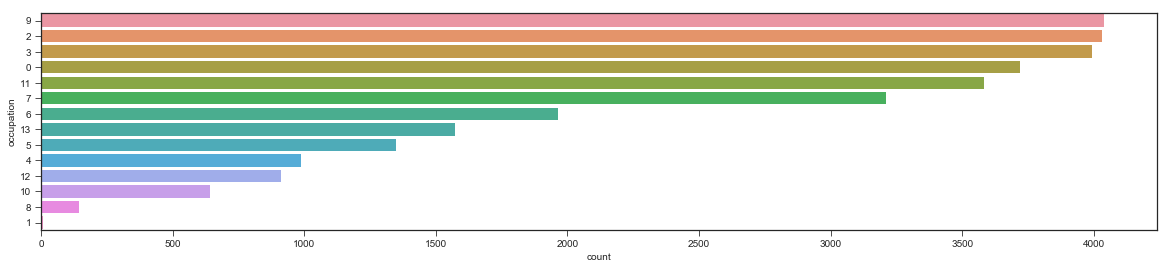

In [117]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df, order=my_df['occupation'].value_counts().index)

### Workclass

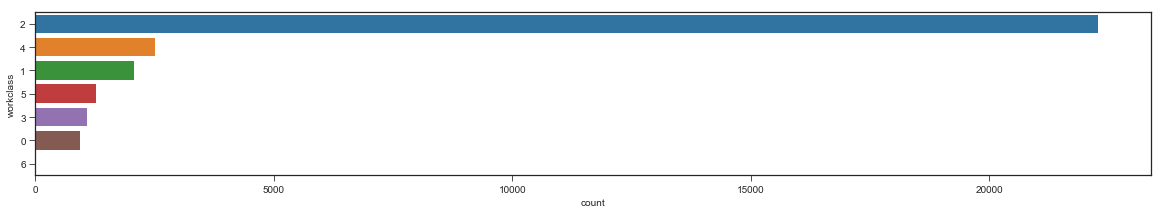

In [118]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df, order=my_df['workclass'].value_counts().index)

### age

In [119]:
# make the age variable discretized 
my_df['age_bin'] = pd.cut(my_df['age'], 20)

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,1,43.95911
0,0,36.60806


### Race

<Figure size 1440x360 with 0 Axes>

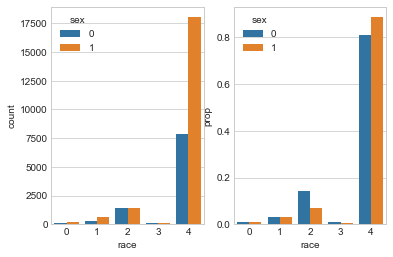

In [121]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

### Hours of Work 

In [122]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Create a crossing visualization : Age + hour of work

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


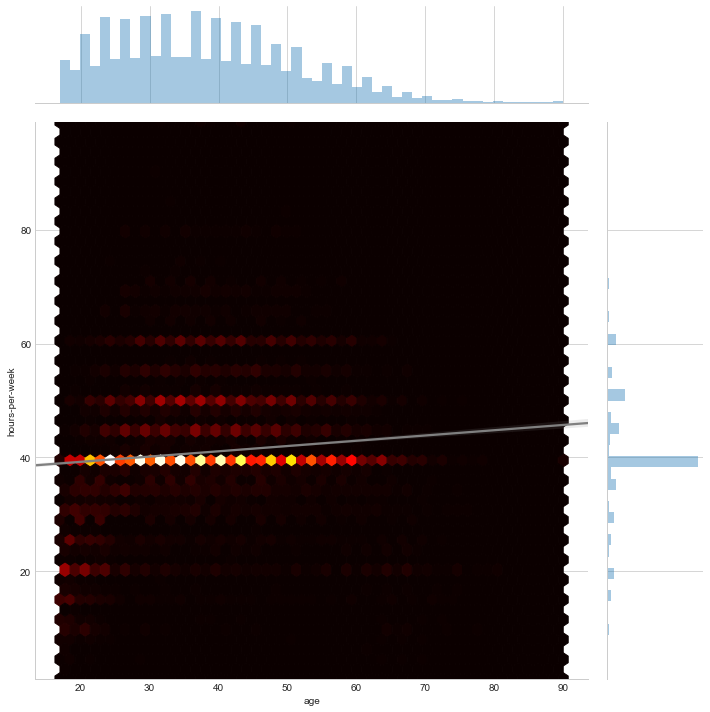

In [123]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#Drawing regressio plot on age and hours per week
sns.regplot(my_df.age, my_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

### Occupation vs. Income Level

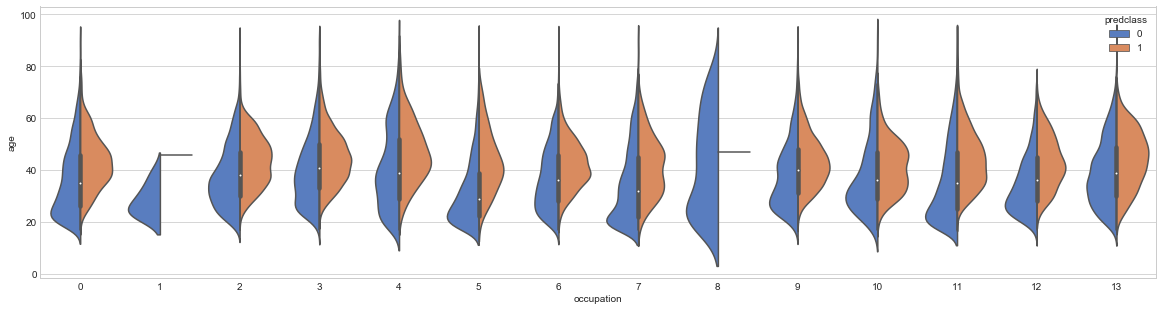

In [124]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

The general trend : more senior workers have higher salaries. Armed-forces don't have a high job salaries.


 private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs. 

### Race vs. Income Level

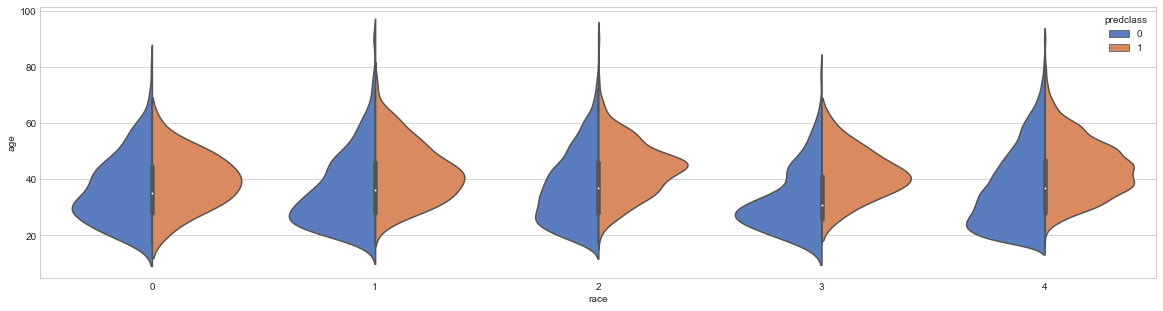

In [125]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Slide Type
For income level above $50k, the mean for each race is almost the same at age of 40.

In [126]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## EDA

### Pair Plot

In [127]:
#pair plots of entire dataset
ppl = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
ppl.set(xticklabels=[])

TypeError: 'dict' object is not callable

### Working hour vs. income level

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20, 60)

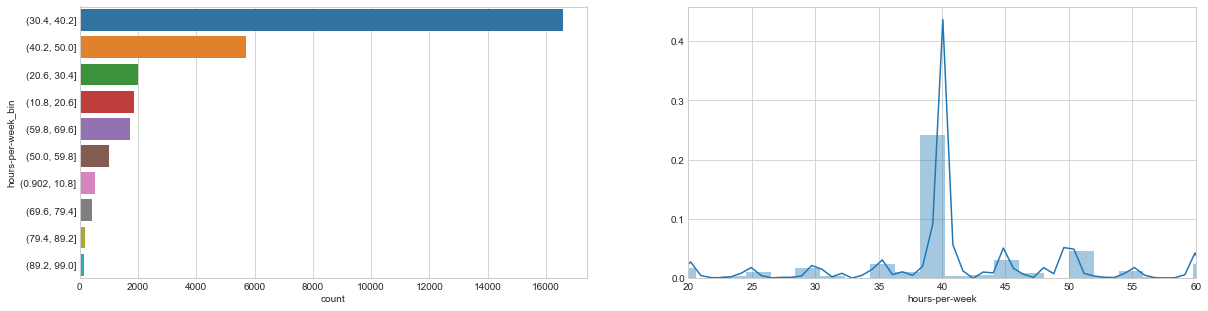

In [128]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df, order=my_df['hours-per-week_bin'].value_counts().index);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == ' >50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == ' <=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)


## Building Machine Learning Models

In [295]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.metrics import accuracy_score#for finding the accuracy score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn import linear_model
from sklearn.calibration import CalibratedClassifierCV#se this also to make other linear_models produce probabilities for classification problems


### Feature Encoding 

In [296]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split


In [297]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,22,5,2491,9,12,1,0,1,4,1,24,0,39,38,0,6,3,589,1
1,33,4,2727,9,12,0,3,0,4,1,0,0,12,38,0,9,1,257,0
2,21,2,13188,11,8,2,5,1,4,1,0,0,39,38,0,5,3,578,1
3,36,2,14354,1,6,0,5,0,2,1,0,0,39,38,0,9,3,766,2
4,11,2,18120,9,12,0,9,5,2,0,0,0,39,4,0,3,3,437,1


### Train-test split

In [298]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)

In [299]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Classification Models

#### Perceptron Method

In [300]:
## Perceptron Method
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [301]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7062821150339798

In [302]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7251216757546814

In [317]:
# generate 2 class dataset
from sklearn import svm
from nltk.classify.scikitlearn import SklearnClassifier
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#logreg = LogisticRegression()
ppn.fit(X_train, y_train)
per = linear_model.Perceptron()
clf_isotonic = CalibratedClassifierCV(per, cv=10, method='isotonic')#use this also to make other linear_models produce probabilities for classification problems
clf_isotonic.fit(X_train, y_train)
probs = clf_isotonic.predict_proba(X_test)
#LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))
probs = probs[:, 1]
yhat = ppn.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
recall = recall_score(y_test, yhat)
precision = precision_score(y_test, yhat)
ap = average_precision_score(y_test, probs)
print('recall=%.3f precision=%.3f ' % (recall, precision))
#ap:avrerage_precision
#auc:area_under_curve(recall and precision)
#f1(F1_score)


recall=0.889 precision=0.755 


#### Gaussian Naive Bayes

In [241]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.905


In [325]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_gaussian=cross_val_score(ppn, X,y, cv=5)
score_gaussian.mean()

0.8459030725768144

In [316]:
# generate 2 class dataset
from nltk.classify.scikitlearn import SklearnClassifier
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#logreg = LogisticRegression()
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
probs = gaussian.predict_proba(X_test)
probs = probs[:, 1]
yhat = gaussian.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1_Gauss = f1_score(y_test, yhat)
#auc = auc(recall)
recall = recall_score(y_test, yhat)
precision = precision_score(y_test, yhat)
ap = average_precision_score(y_test, probs)
print('recall=%.3f precision=%.3f ' % (recall, precision))
#ap:avrerage_precision
#auc:area_under_curve(recall and precision)
#f1(F1_score)

recall=0.967 precision=0.845 


0.8446601941747572

#### Linear Support Vector Machine

In [331]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc1 = SVC(gamma=0.22)
svc1.fit(X_train, y_train)
score_svc = svc1.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.87


In [332]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_svc1=cross_val_score(svc1, X,y, cv=5)
score_svc1.mean()

0.8829987499687493

In [333]:
# generate 2 class dataset
from sklearn import svm
from nltk.classify.scikitlearn import SklearnClassifier
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#logreg = LogisticRegression()
#per = linear_model.Perceptron()
clf_isotonic = CalibratedClassifierCV(svc1, cv=10, method='isotonic')#use this  to make other linear_models produce probabilities for classification problems
clf_isotonic.fit(X_train, y_train)
probs = clf_isotonic.predict_proba(X_test)
#LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))
probs = probs[:, 1]
yhat = svc1.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
recall = recall_score(y_test, yhat)
precision = precision_score(y_test, yhat)
ap = average_precision_score(y_test, probs)
print('recall=%.3f precision=%.3f ' % (recall, precision))
#ap:avrerage_precision
#auc:area_under_curve(recall and precision)
#f1(F1_score)


recall=0.900 precision=0.827 


#### Radical Support Vector Machine

In [334]:
from sklearn.svm import SVC
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train)
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.87


In [335]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_radical=cross_val_score(svc_radical, X,y, cv=5)
score_radical.mean()

0.8829987499687493

In [323]:
from sklearn import svm
from nltk.classify.scikitlearn import SklearnClassifier
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#logreg = LogisticRegression()
#per = linear_model.Perceptron()
clf_isotonic = CalibratedClassifierCV(svc_radical, cv=10, method='isotonic')#use this also to make other linear_models produce probabilities for classification problems
clf_isotonic.fit(X_train, y_train)
probs = clf_isotonic.predict_proba(X_test)
#LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))
probs = probs[:, 1]
yhat = svc_radical.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
recall = recall_score(y_test, yhat)
precision = precision_score(y_test, yhat)
ap = average_precision_score(y_test, probs)
print('recall=%.3f precision=%.3f ' % (recall, precision))
#ap:avrerage_precision
#auc:area_under_curve(recall and precision)
#f1(F1_score)

recall=0.900 precision=0.827 


#### Logistic Regression

In [339]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [340]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
y_predict = logreg.predict(X_test_scaled)
model_score = logreg.score(X_test_scaled, y_test)
print('confusion matrix is',metrics.confusion_matrix(y_test, y_predict))
print('The accuracy of the Logistic Regression is', score_logreg)
#precision = precision_score(X_test,y_test)

confusion matrix is [[105   5]
 [ 20  70]]
The accuracy of the Logistic Regression is 0.905


C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [341]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_logreg=cross_val_score(logreg, X,y, cv=5)
score_logreg.mean()

C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arun.gopalakris

0.8800236255906398

In [342]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)
probs = probs[:, 1]
yhat = logreg.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
recall = recall_score(y_test, yhat)
precision = precision_score(y_test, yhat)
ap = average_precision_score(y_test, probs)
print('recall=%.3f precision=%.3f ' % (recall, precision))
#ap:avrerage_precision
#auc:area_under_curve(recall and precision)
#f1(F1_score)



recall=0.900 precision=0.890 


C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### K-Nearest Neighbors

In [337]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.835


In [338]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_knn=cross_val_score(knn, X,y, cv=5)
score_knn.mean()

0.8529383484587114

In [320]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#logreg = LogisticRegression()
knn.fit(X_train, y_train)
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
yhat = knn.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
recall = recall_score(y_test, yhat)
precision = precision_score(y_test, yhat)
ap = average_precision_score(y_test, probs)
print('recall=%.3f precision=%.3f ' % (recall, precision))
#ap:avrerage_precision
#auc:area_under_curve(recall and precision)
#f1(F1_score)


recall=0.900 precision=0.771 


In [ ]:
import pandas as pd

In [346]:
dict = {'Model_name':[" Perceptron Method", "Gaussian Naive Bayes", "Linear Support Vector Machine", " Radical Support Vector Machine"," Logistic Regression","K-Nearest Neighbors"], 
        'Recall': ["89", "97", "90", "90","90","90"], 'precision': ["75", "85", "83", "83","89","77"],
        'Accuracy':["70","90","87","87","91","84"]} 
  
df = pd.DataFrame(dict) 
  
print(df) 

                        Model_name Recall precision Accuracy
0                Perceptron Method     89        75       70
1             Gaussian Naive Bayes     97        85       90
2    Linear Support Vector Machine     90        83       87
3   Radical Support Vector Machine     90        83       87
4              Logistic Regression     90        89       91
5              K-Nearest Neighbors     90        77       84


Logistic regression is having more accuracy.